Solution steps:
(0, 0)
(3, 0)
(3, 5)
(0, 5)
(3, 2)
(0, 2)
(2, 0)
(2, 5)
(3, 4)


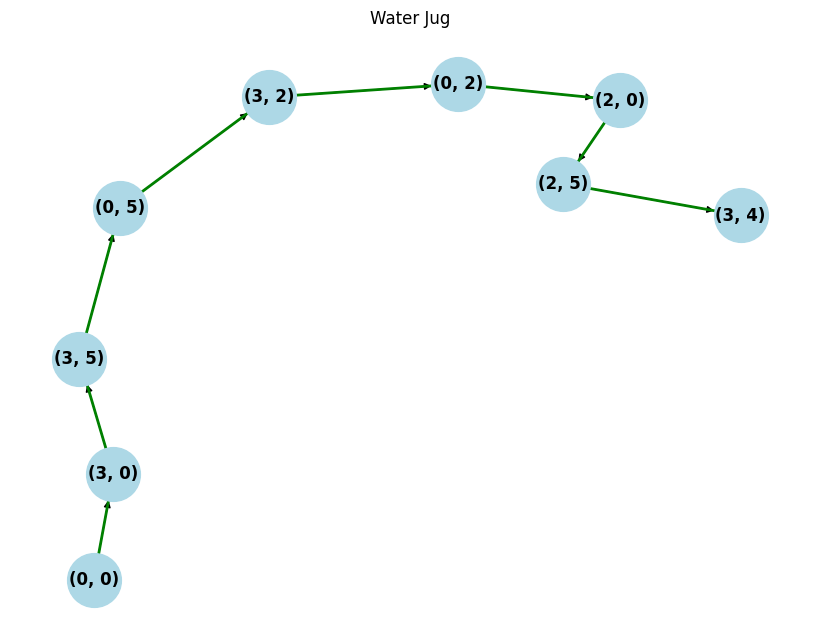

In [9]:
import matplotlib.pyplot as plt
import networkx as nx


def water_jug_dfs(capacity1, capacity2, target):
    visited = set()
    path = []

    def dfs(jug1, jug2):
        if (jug1, jug2) in visited:
            return False
        visited.add((jug1, jug2))
        path.append((jug1, jug2))
        if jug1 == target or jug2 == target:
            return True
        if dfs(3, jug2):
            return True
        if dfs(jug1, 5):
            return True
        if dfs(0, jug2):
            return True
        if dfs(jug1, 0):
            return True
        if dfs(max(0, jug1 - (5 - jug2)), min(5, jug1 + jug2)):
            return True
        if dfs(min(3, jug1 + jug2), max(0, jug2 - (3 - jug1))):
            return True
        path.pop()
        return False
    dfs(0, 0)
    return path


capacity1 = 3
capacity2 = 5
target = 4

solution = water_jug_dfs(capacity1, capacity2, target)

if solution:
    print("Solution steps:")
    for step in solution:
        print(step)
else:
    print("No solution found.")


def visualize_dfs_solution(solution):
    G = nx.DiGraph()

    for i in range(len(solution) - 1):
        G.add_edge(solution[i], solution[i + 1])

    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=list(G.edges()), edge_color='green', width=2)

    plt.title("Water Jug")
    plt.show()


if solution:
    visualize_dfs_solution(solution)
